In [1]:
import urllib.request as req
import requests
import json
import pandas as pd
import numpy as np
import time
from time import sleep

#抓取的網站
url = 'https://www.ptt.cc/bbs/KoreanPop/M.1680235207.A.E56.html'

In [2]:
request = req.Request(url, headers = {
    "User-Agent":'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/106.0.0.0 Safari/537.36'
})

with req.urlopen(request) as response:
    data = response.read().decode("utf-8")

In [3]:
res = requests.get(url, verify=False)
res

C:\Users\Lily\anaconda3\lib\site-packages\urllib3\connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.ptt.cc'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


<Response [200]>

In [4]:
#解析原始碼
import bs4
root=bs4.BeautifulSoup(data, "html.parser")
articles = root.find_all('div', 'push')
for article in articles:
    messages = article.find('span', 'f3 push-content').getText()
    
temp = []
for article in articles:
    messages = article.find('span', 'f3 push-content').getText()
    temp.append(messages)
    
df = pd.DataFrame(temp)
df.head(10)

,0
0,: 先推再看
1,: 推！
2,: 推起來
3,: 推
4,: 推
5,: 看一半好美先推
6,: 110萬人在線 好猛
7,: 中間好生氣XD
8,: 好.....
9,: 就造型很美 而已XDD


In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
#文字探勘
import jieba
import jieba.analyse
import pandas as pd
import numpy as np
from collections import Counter

In [7]:
# 測試結巴功能
documents = ["我是師大Jisoo"]
# 精確模式
for sentence in documents:
    seg_list = jieba.cut(sentence)
    print('/'.join(seg_list))

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Lily\AppData\Local\Temp\jieba.cache
Loading model cost 0.509 seconds.
Prefix dict has been built successfully.


我/是/師大/Jisoo


In [8]:
df['seg'] = " "
index = 0
for documents in df[0]:
    seg_list = jieba.analyse.extract_tags(documents, 150)
    seg_list = jieba.lcut(documents)
    df['seg'].iloc[index] = seg_list
    index += 1

df['seg']

0                                     [:,  , 先, 推, 再, 看]
1                                           [:,  , 推, ！]
2                                          [:,  , 推起, 來]
3                                              [:,  , 推]
4                                              [:,  , 推]
                             ...                        
358               [:,  , 這, 首歌, 的, 舞蹈, 跟, 一些, 服裝, 不行, …]
359    [:,  , 好, 聽, 也, 很, 美,  , 但, 她, 真的, 完全, 不會, 跳舞,...
360                                           [:,  , 回事]
361        [:,  , 感覺, 這, 首歌, 如果, 是, 宣美, 詮釋,  , 應該, 很, 讚]
362                                    [:,  , 副歌, 好, 尷尬]
Name: seg, Length: 363, dtype: object

In [9]:
#合成dict
DICT = df['seg'].to_list()
print(DICT)

[[':', ' ', '先', '推', '再', '看'], [':', ' ', '推', '！'], [':', ' ', '推起', '來'], [':', ' ', '推'], [':', ' ', '推'], [':', ' ', '看', '一半', '好美先', '推'], [':', ' ', '110', '萬人', '在', '線', ' ', '好', '猛'], [':', ' ', '中間', '好生', '氣', 'XD'], [':', ' ', '好', '.....'], [':', ' ', '就', '造型', '很', '美', ' ', '而已', 'XDD'], [':', ' ', '嗯', '.........'], [':', ' ', '舞蹈', '有種', '魔性', 'XDDDDD'], [':', ' ', 'spotify', '神速'], [':', ' ', '副歌', '很', '像', '…', '.', '老奶奶', '的', '舞步', '感', '…', '完蛋', '整首歌', '說', '不出', '…', '.'], [':', ' ', '不', '知道', '是不是', '因為', '唱法', '，', '總覺', '得', '她', '唱', '的', '很', '累', '的', '感覺'], [':', ' ', '有', '一段', '舞蹈', '看', '了', '很', '微妙', 'XD'], [':', ' ', '很', '好', '聽', '欸', '！'], [':', ' ', '舞蹈', '...', '很特別', '哈哈哈', 'XD'], [':', ' ', '喜歡', ' ', 'pre', ' ', 'chorus', ' ', '有', '幾幕', '好像', '湯唯', '哈哈'], [':', ' ', '贊同樓', '上', 'W', '大', '看法', ' ', '中間', '有', '一段', '真的', '覺得', '唱', '得', '很', '累', '的', '感覺'], [':', ' ', '好像', '只有', '預告', '那句', '最', '讚', '....'], [':', ' ', 'Pre', ' ',

In [10]:
#將list內部的元素拆分
List = []
for key in range(len(DICT)):
    for value in DICT[key]:
        List.append(value)
print(DICT)

[[':', ' ', '先', '推', '再', '看'], [':', ' ', '推', '！'], [':', ' ', '推起', '來'], [':', ' ', '推'], [':', ' ', '推'], [':', ' ', '看', '一半', '好美先', '推'], [':', ' ', '110', '萬人', '在', '線', ' ', '好', '猛'], [':', ' ', '中間', '好生', '氣', 'XD'], [':', ' ', '好', '.....'], [':', ' ', '就', '造型', '很', '美', ' ', '而已', 'XDD'], [':', ' ', '嗯', '.........'], [':', ' ', '舞蹈', '有種', '魔性', 'XDDDDD'], [':', ' ', 'spotify', '神速'], [':', ' ', '副歌', '很', '像', '…', '.', '老奶奶', '的', '舞步', '感', '…', '完蛋', '整首歌', '說', '不出', '…', '.'], [':', ' ', '不', '知道', '是不是', '因為', '唱法', '，', '總覺', '得', '她', '唱', '的', '很', '累', '的', '感覺'], [':', ' ', '有', '一段', '舞蹈', '看', '了', '很', '微妙', 'XD'], [':', ' ', '很', '好', '聽', '欸', '！'], [':', ' ', '舞蹈', '...', '很特別', '哈哈哈', 'XD'], [':', ' ', '喜歡', ' ', 'pre', ' ', 'chorus', ' ', '有', '幾幕', '好像', '湯唯', '哈哈'], [':', ' ', '贊同樓', '上', 'W', '大', '看法', ' ', '中間', '有', '一段', '真的', '覺得', '唱', '得', '很', '累', '的', '感覺'], [':', ' ', '好像', '只有', '預告', '那句', '最', '讚', '....'], [':', ' ', 'Pre', ' ',

In [11]:
results = pd.value_counts(List)
results.head(10)

      569
:     365
的     126
，      85
聽      84
好      71
很      66
真的     43
了      40
是      38
dtype: int64

In [12]:
# 設定停用詞
stop_words = open('stop_words.txt', 'r', encoding='utf-8').read()

# 斷詞
seg_list = jieba.lcut(' '.join(results.index), cut_all=False)

# 篩選停用詞
seg_list = [word for word in List if word not in stop_words]
#seg_list

In [13]:
results2 = pd.value_counts(seg_list)
results2.head(10)

:        365
聽         84
真的        43
歌         35
覺得        25
感覺        25
…         25
Jisoo     23
副歌        22
...       20
dtype: int64

In [14]:
#用來產生文字雲
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

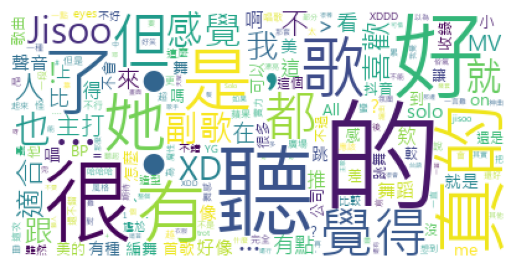

<Figure size 400x600 with 0 Axes>

In [16]:
wc = WordCloud(font_path= "C:\Windows\Fonts\msjh.ttc", 
               background_color="white", 
               max_words = 200 ,       
               )      

wc.generate_from_frequencies(results)
 
# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(20,30), dpi =20)
plt.show()